# Pymaceuticals Inc.
---

### Analysis

- As observed in stats_df, Ramicane seems to be the most effective drug regimen as the corresponding Mean Tumor Vol is only 40.216745 followed by Capomulin at 40.675741
- As observed from the bar plots, most popular drug regimens for testing are Capomulin with 230 mice timepoints tested followed by Ramicane with 228 mice timepoints tested
- As observed from the pie chart, almost equal number of Male and Female mice are used for testing
- As observed from the box plot, only outliers are present in Infubinol data. Hence the data collected is quite reliable for analysis
- The correlation between Weight and Tumor Vol is 0.84 which suggest a strong correlation (As the weight of mouse increases, there is an increase in the Tumor Volume.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
study_data_complete = pd.merge(mouse_metadata,study_results, on=["Mouse ID"])


# Display the data table for preview
study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
study_data_complete.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [6]:
# Checking the number of mice.
mouse_count = study_data_complete['Mouse ID'].nunique()
mouse_count

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. Mouse ID
dup_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mouse_ids


array(['g989'], dtype=object)

In [8]:
dup_study_data_complete=study_data_complete[study_data_complete.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
dup_study_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
clean_study_data_complete = study_data_complete[study_data_complete['Mouse ID'].isin(dup_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice in the clean DataFrame.
mouse_count = clean_study_data_complete['Mouse ID'].nunique()
mouse_count

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean=clean_study_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median=clean_study_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance=clean_study_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std_dev=clean_study_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem=clean_study_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

stats_df=pd.DataFrame({
    "Mean Tumor Volume":mean,
    "Median Tumor Volume":median,
    "Tumor Volume Variance":variance,
    "Tumor Volume Std. Dev.":std_dev,
    "Tumor Volume Std. Err.":sem
})

stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
group_df=clean_study_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)']
# Using the aggregation method, produce the same summary statistics in a single line
group_df.aggregate(["mean","median","var","std","sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [15]:
vc=clean_study_data_complete['Drug Regimen'].value_counts()
vc

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

<Axes: ylabel='# of observed Mouse Timepoints'>

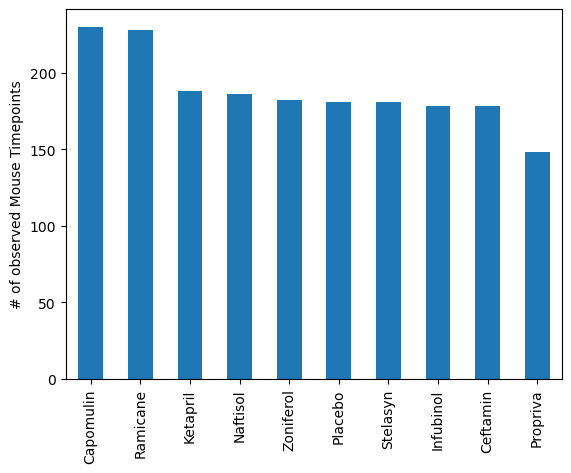

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
vc.plot(kind="bar", ylabel='# of observed Mouse Timepoints')

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64


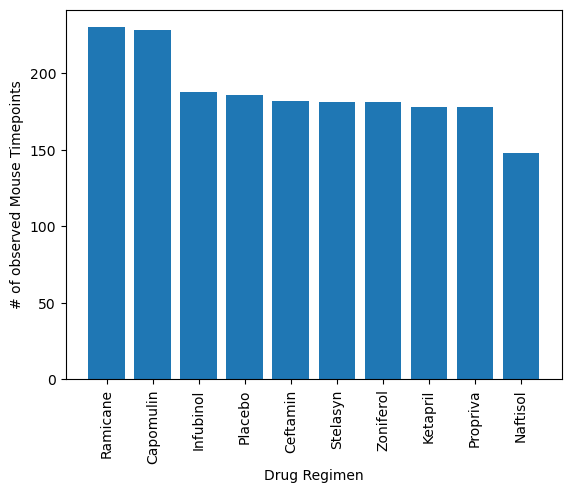

In [40]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
value_count=clean_study_data_complete['Drug Regimen'].value_counts()
print(value_count)
dr=clean_study_data_complete['Drug Regimen'].unique()

plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints", rotation=90)
plt.bar(dr,value_count)
plt.xticks(rotation = 90)
plt.savefig("barplot.jpg")

<Axes: ylabel='Sex'>

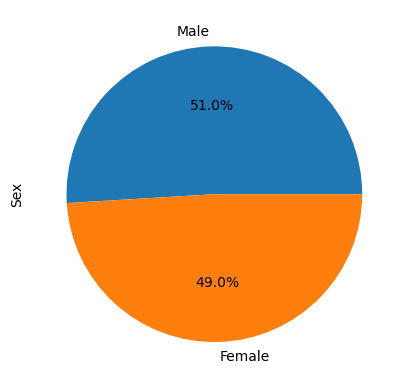

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_study_data_complete['Sex'].value_counts().plot(kind='pie', y='Sex',autopct='%1.1f%%')


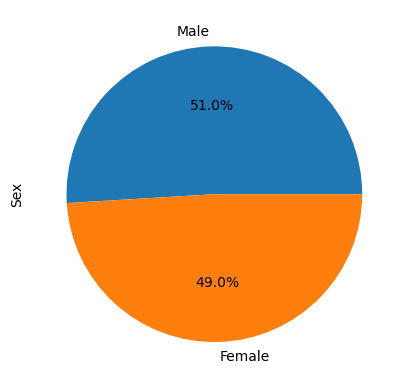

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex_dist=clean_study_data_complete['Sex'].unique()

mice_sex_count=clean_study_data_complete['Sex'].value_counts()


plt.pie(mice_sex_count,labels=mice_sex_dist,
        autopct="%1.1f%%")
plt.ylabel("Sex")
plt.savefig("piechart.jpg")

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_df=clean_study_data_complete.loc[(clean_study_data_complete["Drug Regimen"] == "Capomulin")|
                                     (clean_study_data_complete["Drug Regimen"] == "Ramicane")|
                                     (clean_study_data_complete["Drug Regimen"] == "Infubinol")|
                                     (clean_study_data_complete["Drug Regimen"] == "Ceftamin")
                                       ,:]

treatment_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [22]:

# Start by getting the last (greatest) timepoint for each mouse
timepoint_df = treatment_df.groupby(['Mouse ID'])['Timepoint'].max()
timepoint_df_reset_ind=timepoint_df.reset_index()
timepoint_df_reset_ind.head()
print(timepoint_df_reset_ind)


    


   Mouse ID  Timepoint
0      a203         45
1      a251         45
2      a275         45
3      a411         45
4      a444         45
..      ...        ...
95     y769         45
96     y793         45
97     y865         45
98     z578         45
99     z581         45

[100 rows x 2 columns]


In [23]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_df = pd.merge(timepoint_df_reset_ind,treatment_df, on=["Mouse ID","Timepoint"], how="left")
tumor_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
#treatment_list==['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

treatment_list=tumor_df['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

outlier=[]

    # Locate the rows which contain mice on each drug and get the tumor volumes
for t in treatment_list:
     # add subset 
    tumor_vol_data=tumor_df.loc[tumor_df["Drug Regimen"] == t,'Tumor Volume (mm3)']
    tumor_vol_list.append(tumor_vol_data)
    quartiles = tumor_vol_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr_t = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr_t)
    upper_bound = upperq + (1.5*iqr_t)
    
    
    # Determine outliers using upper and lower bounds
    
    outlier=tumor_vol_data.loc[(tumor_vol_data < lower_bound) | (tumor_vol_data > upper_bound)]
    if len(outlier)>0:
        print (f"outliers present for {t}")
        print(f"Values for {t} that are outliers are  {outlier}")
    else:
        print(f"No outliers for {t}")
    

outliers present for Infubinol
Values for Infubinol that are outliers are  15    36.321346
Name: Tumor Volume (mm3), dtype: float64
No outliers for Ceftamin
No outliers for Ramicane
No outliers for Capomulin


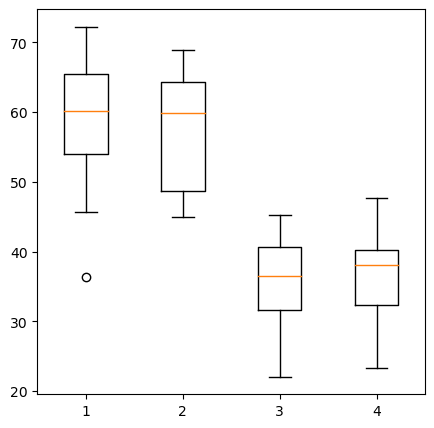

In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax = plt.subplots(figsize=(5,5))
ax.boxplot(tumor_vol_list)
plt.savefig("boxplot.jpg")
plt.show()

## Line and Scatter Plots

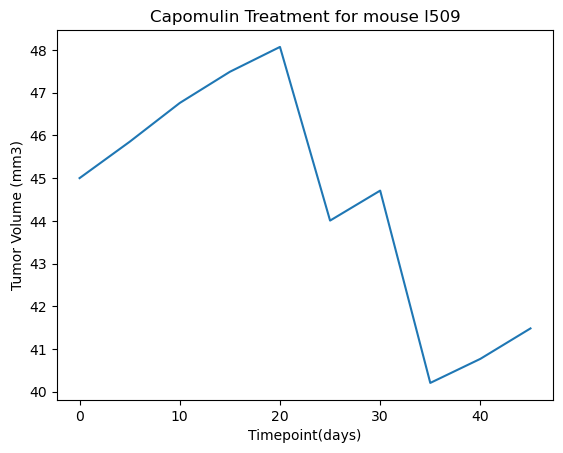

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df=clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin"
                                       ,:]

single_mouse_df=Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
plt.plot(single_mouse_df['Timepoint'], single_mouse_df['Tumor Volume (mm3)'])
         
         
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment for mouse l509" )
plt.savefig("lineplot.jpg")

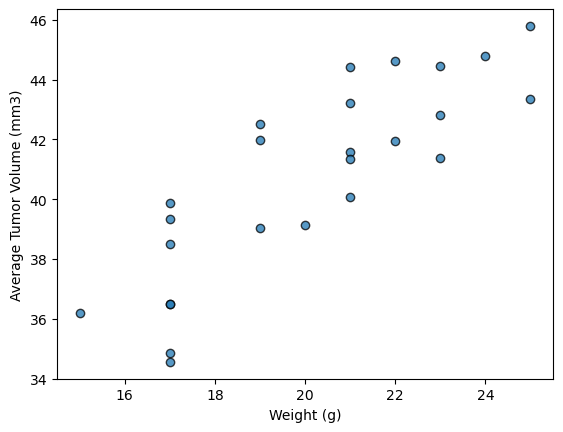

In [37]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_regimen=clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin"
                                       ,:].groupby('Mouse ID')[['Weight (g)','Tumor Volume (mm3)' ]].mean()

plt.scatter(Capomulin_regimen['Weight (g)'],Capomulin_regimen['Tumor Volume (mm3)'],marker="o",edgecolors="black",alpha=0.75 )

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig("scatterplot.jpg")

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(Capomulin_regimen['Weight (g)'],Capomulin_regimen['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


y = 0.95x + 21.55


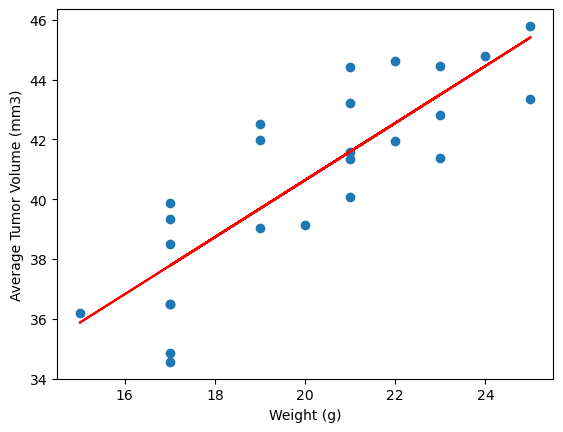

In [38]:
# a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(Capomulin_regimen['Weight (g)'], Capomulin_regimen['Tumor Volume (mm3)'])

regress_values = Capomulin_regimen['Weight (g)'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print( line_eq )
plt.scatter(Capomulin_regimen['Weight (g)'],Capomulin_regimen['Tumor Volume (mm3)'])


plt.plot(Capomulin_regimen['Weight (g)'],regress_values,"r-")


plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig("regressionplot.jpg")

In [30]:
Capomulin_regimen_reg=Capomulin_regimen.assign(RegTumorVol=regress_values)

In [31]:
Capomulin_regimen_reg.head()

,Weight (g),Tumor Volume (mm3),RegTumorVol
Mouse ID,,,
b128,22.0,41.963636,42.549834
b742,21.0,40.083699,41.595394
f966,17.0,36.505973,37.777635
g288,19.0,41.990097,39.686515
g316,22.0,44.613344,42.549834
